In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas
%matplotlib notebook

In [12]:
alpha = 0.1
def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.6 - 2*0.5 - 3*0.2) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]
MMX = 1*12 + 1.6*1 + 0.5*16 + 0.2*14

In [13]:
Data = np.array(pandas.read_csv('Chemostat\Thierie 2004\Thierie 2004 cX.csv', header = None))
D = Data[:,0]
cX = Data[:,1]/MMX
cE = Data[:,2]/23
cS = Data[:,3]/30
theta = 0

PO = 1.5
cSf = 5/30

In [14]:
gammalys = []
rElys = []
rSlys = []
for i in range(0, len(D)):
    def Energy(var):
        gamma, rE, rS = var
        mu = D[i]
        S = np.matrix([[-1, 1 + alpha, 1,   1,    0,    0,   0],
                       [0,  0,         0,   -1,   1,    3/2, 0],
                       [0,  beta,      2,   0,    -1/3, 0,   -2],
                       [0,  -gamma,    2/3, -1/3, 0,    1,   2*PO],
                       [0,  1,         0,   0,    0,    0,   0],
                       [0,  0,         0,   0,    0,    1,   0],
                       [1,  0,         0,   0,    0,    0,   0]])

        C = np.array([0, 0, 0, theta, mu, rE, rS]).T
        r = np.linalg.solve(S, C)

        nul1 = -gamma*r[1] + 2/3*r[2] + 1/2*r[5] + 2*PO*r[6] #- 1/3*r[3] 
        nul2 = rE*cX[i] + D[i]*cE[i]
        nul3 = D[i]*(cSf - cS[i]) - rS*cX[i]
        return nul1, nul2, nul3
    opl = fsolve(Energy, [1.8, 1, cSf])
    gamma = opl[0]
    gammalys.append(gamma)
    rE = opl[1]
    rElys.append(rE)
    rS = opl[2]
    rSlys.append(rS)
gamma = np.array(gammalys)
rE = np.array(rElys)
rS = np.array(rSlys)

In [15]:
rATP = gamma*D*1000/MMX # mmol/g/h

<IPython.core.display.Javascript object>


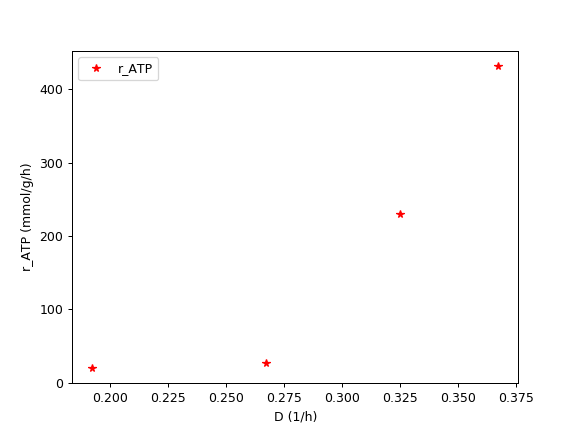

In [16]:
plt.figure(1)
plt.plot(D, rATP, 'r*', label = 'r_ATP')
plt.xlabel('D (1/h)')
plt.ylabel('r_ATP (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Thierie 2004/r_ATP vs D.png', dpi = 300)
plt.show()

In [17]:
# plt.figure(2)
# plt.plot(D, rE, 'b*')
# plt.show()

In [18]:
rlys = []
for i in range(0, len(D)):
    mu = D[i]
    S = np.matrix([[-1, 1 + alpha, 1,   1,    0,    0,   0],
                   [0,  0,         0,   -1,   1,    3/2, 0],
                   [0,  beta,      2,   0,    -1/3, 0,   -2],
                   [0,  -gamma[i],    2/3, -1/3, 0,    1,   2*PO],
                   [0,  1,         0,   0,    0,    0,   0],
                   [0,  0,         0,   0,    0,    1,   0],
                   [1,  0,         0,   0,    0,    0,   0]])

    C = np.array([0, 0, 0, theta, mu, rE[i], rS[i]]).T
    r = np.linalg.solve(S, C)
    rlys.append(r)
r = np.array(rlys)
rO = r[:,6]*1000/MMX #mmol/g/h
rC = (alpha*r[:,1] + r[:,2] + 1/2*r[:,5])*1000/MMX #mmol/g/h

<IPython.core.display.Javascript object>


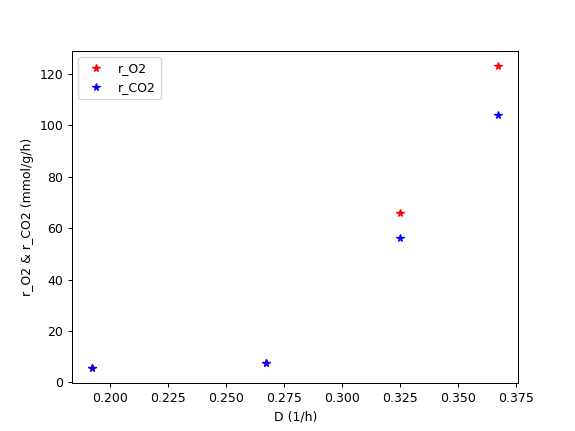

In [19]:
plt.figure(3)
plt.plot(D, rO, 'r*', label = 'r_O2')
plt.plot(D, rC, 'b*', label = 'r_CO2')
plt.xlabel('D (1/h)')
plt.ylabel('r_O2 & r_CO2 (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Thierie 2004/r_O2 & r_CO2 vs D.png', dpi = 300)
plt.show()

In [20]:
df1 = pandas.DataFrame({'D': D,
                        'c_X': cX*MMX,
                        'c_E': cE*23,
                        'c_S': cS*30,
                        'r_ATP': rATP,
                        'r_O2': rO,
                        'r_CO2': rC})

df1.to_csv('Thierie 2004.csv')

# writer = pandas.ExcelWriter('Results.xlsx', engine='xlsxwriter')

# df6.to_excel(writer, sheet_name='Thierie 2004')

# writer.save()